In [40]:
#Data loading & preparation 

import pandas as pd
import numpy as np

# Load the datasets
app_data = pd.read_csv("D:\\apps.csv")
reviews_data = pd.read_csv("D:\\user_reviews.csv")

# Display the first few rows of the app data
print(app_data.head())

# Display the first few rows of the reviews data
print(reviews_data.head())

# Clean and correct data types for accuracy
app_data['Installs'] = app_data['Installs'].str.replace('+', '',regex=False).str.replace(',', '',regex=False).astype(int)
app_data['Price'] = app_data['Price'].str.replace('$', '',regex=False).astype(float)


# Handle missing values
app_data.dropna(inplace=True)
reviews_data.dropna(inplace=True)


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

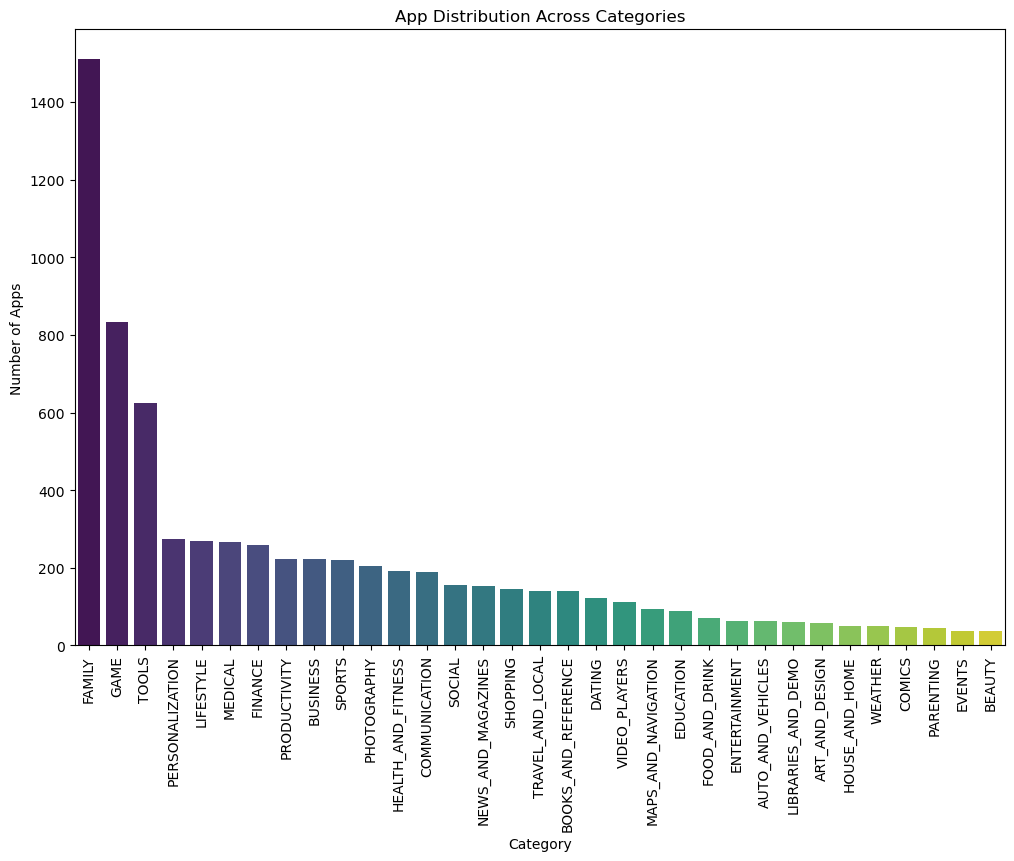

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of apps across categories
category_counts = app_data['Category'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()


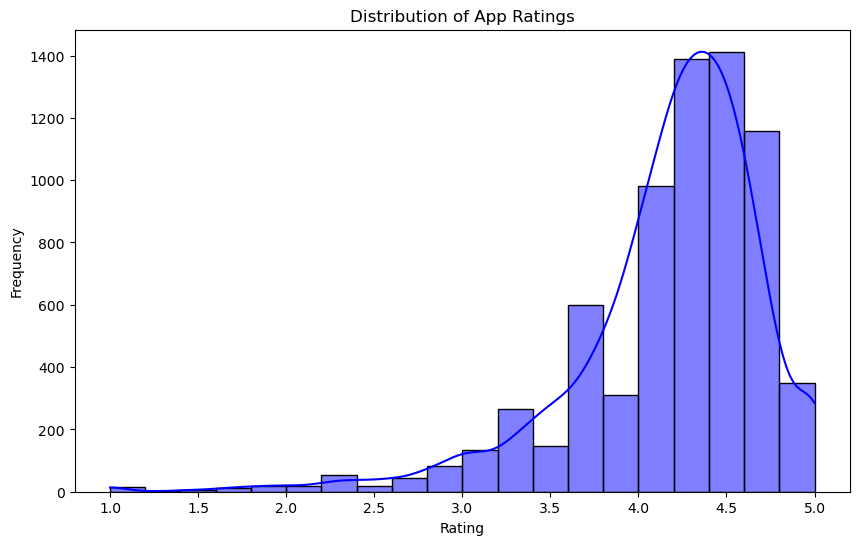

In [42]:
# Analysis of app ratings
plt.figure(figsize=(10, 6))
sns.histplot(app_data['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

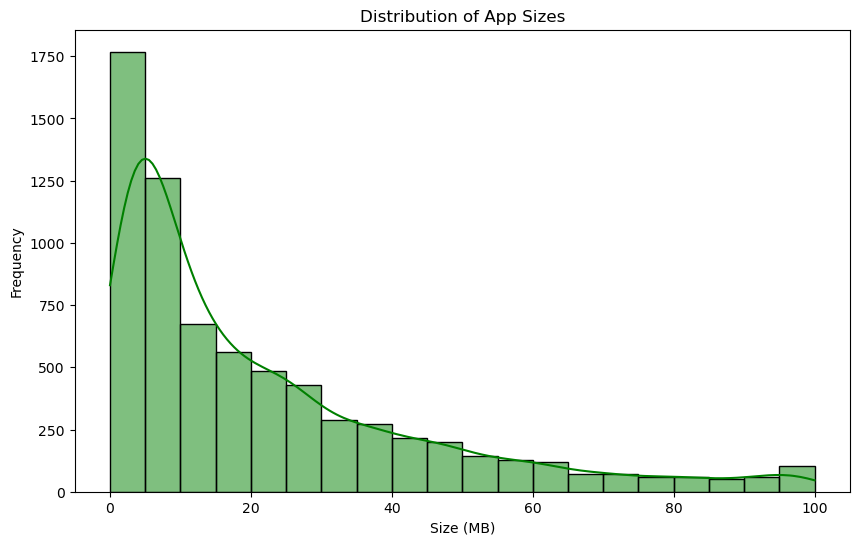

In [43]:
# Analysis of app sizes
plt.figure(figsize=(10, 6))
sns.histplot(app_data['Size'], bins=20, kde=True, color='green')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.show()

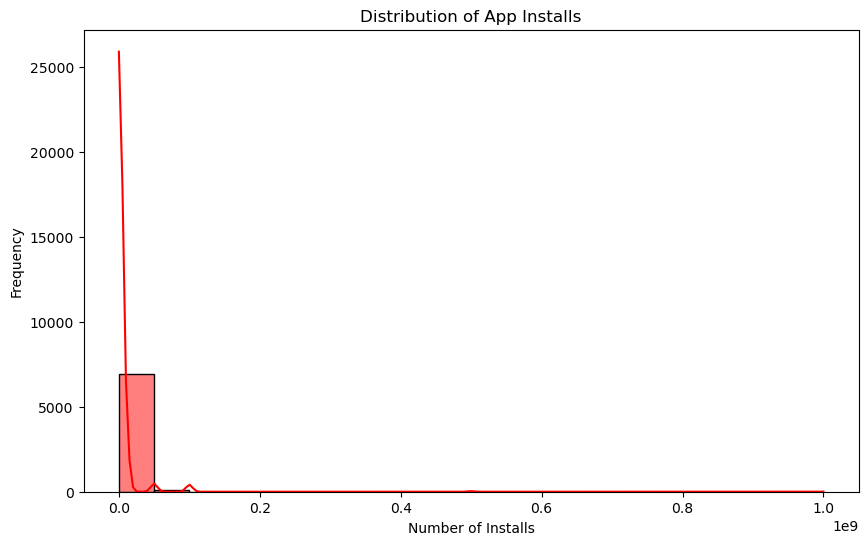

In [44]:
# Analysis of app installs
plt.figure(figsize=(10, 6))
sns.histplot(app_data['Installs'], bins=20, kde=True, color='red')
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()

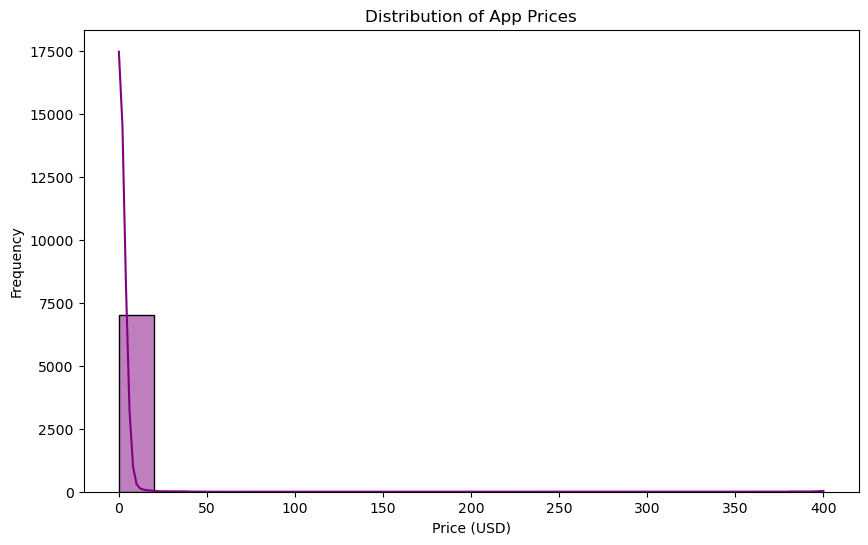

In [45]:
# Analysis of app pricing
plt.figure(figsize=(10, 6))
sns.histplot(app_data['Price'], bins=20, kde=True, color='purple')
plt.title('Distribution of App Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


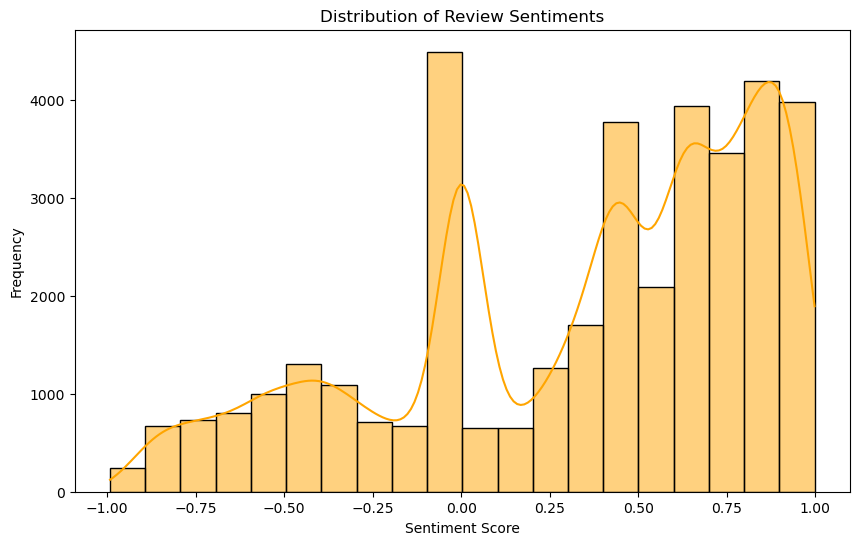

In [46]:
#analysing text sentiment using NLP 

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis
reviews_data['sentiment'] = reviews_data['Translated_Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Display sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(reviews_data['sentiment'], bins=20, kde=True, color='orange')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [47]:
# Interactive visualization for google playstore data analysis 

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

category_counts = app_data['Category'].value_counts()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Google Play Store Data Analysis"),
    dcc.RadioItems(
        id='plot-selection-radio',
        options=[
            {'label': 'App Categories', 'value': 'categories'},
            {'label': 'App Ratings', 'value': 'ratings'},
            {'label': 'App Installs', 'value': 'installs'},
            {'label': 'App Prices', 'value': 'prices'},
            {'label': 'Review Sentiments', 'value': 'sentiments'}
        ],
        value='categories',
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id='interactive-plot')
])

# Define the callback to update the graph based on radio button selection
@app.callback(
    Output('interactive-plot', 'figure'),
    [Input('plot-selection-radio', 'value')]
)
def update_graph(selected_plot):
    if selected_plot == 'categories':
        fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values, 
                     title='App Distribution Across Categories', labels={'x':'Category', 'y':'Number of Apps'})
    elif selected_plot == 'ratings':
        fig = px.histogram(app_data, x='Rating', nbins=20, title='Distribution of App Ratings', labels={'Rating':'Rating'})
    elif selected_plot == 'installs':
        fig = px.histogram(app_data, x='Installs', nbins=10, title='Distribution of App Installs', labels={'Installs':'Number of Installs'})
    elif selected_plot == 'prices':
        fig = px.histogram(app_data, x='Price', nbins=20, title='Distribution of App Prices', labels={'Price':'Price (USD)'})
    elif selected_plot == 'sentiments':
        fig = px.histogram(reviews_data, x='sentiment', nbins=20, title='Distribution of Review Sentiments', labels={'sentiment':'Sentiment Score'})
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
